In [1]:
import pandas as pd
pd.set_option("display.max_columns",45)
base_path = "../data/processed/"

files = {
    "order": "order_clean.csv",
    "product": "product_clean.csv",
    "customer": "customer_clean.csv",
    "order_item": "order_item_clean.csv",
    "geolocation": "geolocation_clean.csv",
    "order_payment": "order_payment_clean.csv",
    "order_review": "order_review_clean.csv",
    "seller": "seller_clean.csv",
    "translation": "translation_clean.csv"
}

dfs = {}

for name,file in files.items():
    
    dfs[name] = pd.read_csv(f"{base_path+file}")
    

In [2]:
merged_df = dfs["order"] \
        .merge(dfs["customer"], on="customer_id", how="left") \
        .merge(dfs["order_item"], on="order_id", how="left") \
        .merge(dfs["seller"], on="seller_id", how="left") \
        .merge(dfs["product"], on="product_id", how="left") \
        .merge(dfs["translation"], on="product_category_name", how="left") \
        .merge(dfs["order_payment"], on="order_id", how="left") \
        .merge(dfs["order_review"], on="order_id", how="left")

merged_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [3]:
merged_df.shape

(119143, 40)

In [4]:
purchase_dt = pd.to_datetime(merged_df["order_purchase_timestamp"])
delivered_dt = pd.to_datetime(merged_df["order_delivered_customer_date"])
estimated_dt = pd.to_datetime(merged_df["order_estimated_delivery_date"])

merged_df["delivery_days"] = (delivered_dt - purchase_dt).dt.days
merged_df["estimated_days"] = (estimated_dt - purchase_dt).dt.days
merged_df["delivered_late"] = (merged_df["delivery_days"] > merged_df["estimated_days"]).astype(int)

merged_df["order_day_of_week"] =purchase_dt.dt.dayofweek
merged_df["order_month"] =purchase_dt.dt.month



In [5]:
merged_df.shape

(119143, 45)

In [6]:
cleaned_df = merged_df.dropna(subset=["order_delivered_customer_date"])

cleaned_df = cleaned_df.dropna(subset=["price", "freight_value", "seller_id", "product_id"])

meta_cols = ["product_name_lenght", "product_description_lenght", "product_photos_qty"]
for col in meta_cols:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())



In [7]:
cleaned_df.shape

(115722, 45)

In [8]:
cleaned_df.shape
final_df = cleaned_df.copy()

In [9]:
grp_zip = dfs["geolocation"].groupby("geolocation_zip_code_prefix")
df_loc = grp_zip[["geolocation_lat","geolocation_lng"]].mean().reset_index()
df_loc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343920,-51.874988
19013,99980,-28.389500,-51.843122


In [10]:
final_df = final_df.merge(df_loc,left_on="customer_zip_code_prefix",right_on="geolocation_zip_code_prefix",how = "left")
final_df.rename(columns={"geolocation_lat": "cust_lat", "geolocation_lng": "cust_lng"}, inplace=True)
final_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)


final_df = final_df.merge(df_loc,left_on="seller_zip_code_prefix",right_on="geolocation_zip_code_prefix",how = "left")
final_df.rename(columns={"geolocation_lat": "seller_lat", "geolocation_lng": "seller_lng"}, inplace=True)
final_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)



In [11]:
from geopy.distance import geodesic
import numpy as np

def compute_distance(row):
        if pd.isna(row["cust_lat"]) or pd.isna(row["seller_lat"]):
            return np.nan
        return geodesic((row["cust_lat"], row["cust_lng"]), (row["seller_lat"], row["seller_lng"])).km

final_df["distance_seller_customer"] = final_df.apply(compute_distance,axis=1)


In [12]:
final_df = final_df.drop(columns=[
    "review_id",
    "review_score",
    "review_comment_title",
    "review_comment_message",
    "review_creation_date",
    "review_answer_timestamp",
    
])

In [13]:
final_df = final_df.dropna(subset=[
    "distance_seller_customer",
    "order_approved_at",
    "order_delivered_carrier_date",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "payment_sequential",
    "payment_type",
    "payment_installments",
    "payment_value"
])


In [14]:
final_df["product_category_name_english"] = final_df["product_category_name_english"].fillna("unknown")


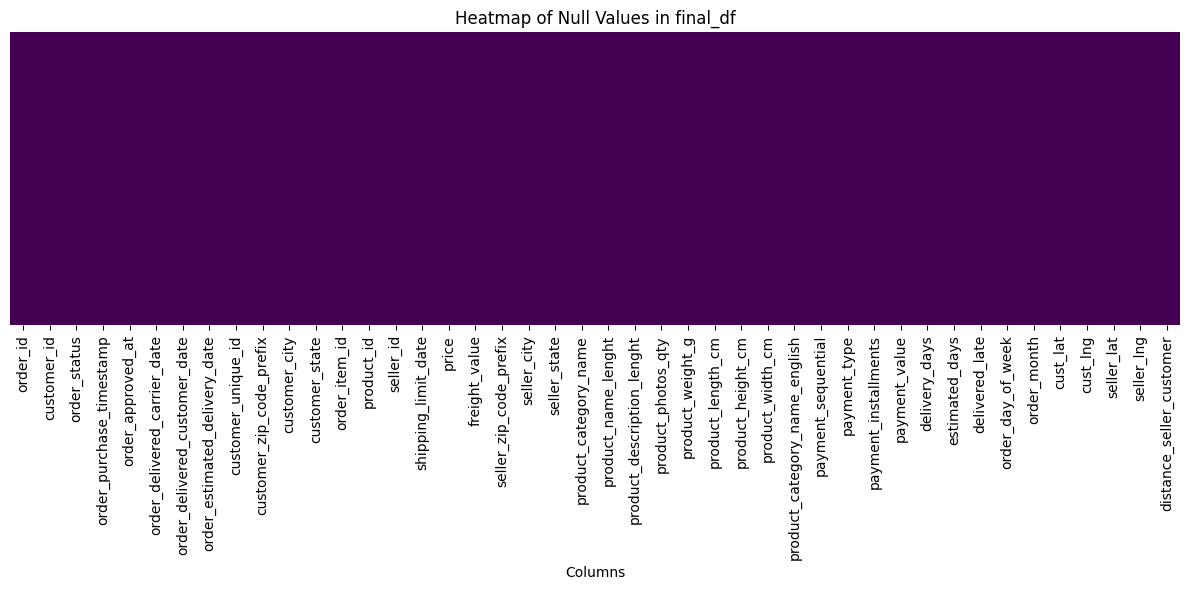

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(final_df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Null Values in final_df")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()


In [16]:
final_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'delivery_days',
       'estimated_days', 'delivered_late', 'order_day_of_week', 'order_month',
       'cust_lat', 'cust_lng', 'seller_lat', 'seller_lng',
       'distance_seller_customer'],
      

In [17]:
final_df.shape

(115120, 44)

In [18]:
final_df.select_dtypes(include='object').columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'shipping_limit_date', 'seller_city', 'seller_state',
       'product_category_name', 'product_category_name_english',
       'payment_type'],
      dtype='object')

In [19]:
obj_cols = final_df.select_dtypes(include='object').columns
threshold = 50
suggestions = {}
for col in obj_cols:
    nunique = final_df[col].nunique()
    if nunique == final_df.shape[0]:
        suggestions[col] = "Identifier — skip"
    elif nunique > threshold:
        suggestions[col] = f"High cardinality ({nunique}) — consider bucketing or embedding"
    else:
        suggestions[col] = f"Low/moderate cardinality ({nunique}) — good candidate for encoding"

suggestions

{'order_id': 'High cardinality (95968) — consider bucketing or embedding',
 'customer_id': 'High cardinality (95968) — consider bucketing or embedding',
 'order_status': 'Low/moderate cardinality (2) — good candidate for encoding',
 'order_purchase_timestamp': 'High cardinality (95452) — consider bucketing or embedding',
 'order_approved_at': 'High cardinality (87844) — consider bucketing or embedding',
 'order_delivered_carrier_date': 'High cardinality (79712) — consider bucketing or embedding',
 'order_delivered_customer_date': 'High cardinality (95162) — consider bucketing or embedding',
 'order_estimated_delivery_date': 'High cardinality (444) — consider bucketing or embedding',
 'customer_unique_id': 'High cardinality (92875) — consider bucketing or embedding',
 'customer_city': 'High cardinality (4036) — consider bucketing or embedding',
 'customer_state': 'Low/moderate cardinality (27) — good candidate for encoding',
 'product_id': 'High cardinality (32103) — consider bucketing 

In [20]:
def clean_and_encode(df):
    cat_cols = ["payment_type", "order_status", "customer_state", "seller_state", "product_category_name_english"]
    drop_cols = [
        "order_id", "customer_id", "product_id", "seller_id", "customer_unique_id",
        "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
        "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
        "customer_city", "seller_city", "product_category_name"
    ]
    df = df.drop(columns=drop_cols)
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

df_master = clean_and_encode(final_df)



In [21]:
df_master

,customer_zip_code_prefix,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,delivery_days,estimated_days,delivered_late,order_day_of_week,order_month,cust_lat,cust_lng,...,product_category_name_english_industry_commerce_and_business,product_category_name_english_kitchen_dining_laundry_garden_furniture,product_category_name_english_la_cuisine,product_category_name_english_luggage_accessories,product_category_name_english_market_place,product_category_name_english_music,product_category_name_english_musical_instruments,product_category_name_english_office_furniture,product_category_name_english_party_supplies,product_category_name_english_perfumery,product_category_name_english_pet_shop,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_unknown,product_category_name_english_watches_gifts
0,3149,1.0,29.99,8.72,9350.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,1.0,18.12,8.0,15,0,0,10,-23.577482,-46.587077,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3149,1.0,29.99,8.72,9350.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,1.0,2.00,8.0,15,0,0,10,-23.577482,-46.587077,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3149,1.0,29.99,8.72,9350.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,1.0,18.59,8.0,15,0,0,10,-23.577482,-46.587077,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,47813,1.0,118.70,22.76,31570.0,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,1.0,141.46,13.0,19,0,1,7,-12.186877,-44.540232,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,75265,1.0,159.90,19.22,14840.0,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,3.0,179.12,9.0,26,0,2,8,-16.745150,-48.514783,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115717,11722,1.0,174.90,20.10,17602.0,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,3.0,195.00,22.0,23,0,1,2,-24.001334,-46.450022,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115718,45920,1.0,205.99,65.02,8290.0,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,1.0,5.0,271.01,24.0,30,0,6,8,-17.898045,-39.373106,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115719,28685,1.0,179.99,40.59,37175.0,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,4.0,441.16,17.0,37,0,0,1,-22.563909,-42.695343,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115720,28685,2.0,179.99,40.59,37175.0,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,4.0,441.16,17.0,37,0,0,1,-22.563909,-42.695343,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
final_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,delivery_days,estimated_days,delivered_late,order_day_of_week,order_month,cust_lat,cust_lng,seller_lat,seller_lng,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12,8.0,15,0,0,10,-23.577482,-46.587077,-23.680862,-46.444311,18.528985
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00,8.0,15,0,0,10,-23.577482,-46.587077,-23.680862,-46.444311,18.528985
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59,8.0,15,0,0,10,-23.577482,-46.587077,-23.680862,-46.444311,18.528985
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46,13.0,19,0,1,7,-12.186877,-44.540232,-19.807885,-43.980818,845.460167
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12,9.0,26,0,2,8,-16.745150,-48.514783,-21.363473,-48.229588,512.096987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115717,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602.0,tupa,SP,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby,1.0,credit_card,3.0,195.00,22.0,23,0,1,2,-24.001334,-46.450022,-21.930464,-50.498065,474.214680
115718,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:

In [23]:
df_master.shape

(115120, 147)

In [24]:
df_master.columns


Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'seller_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm',
       ...
       'product_category_name_english_signaling_and_security',
       'product_category_name_english_small_appliances',
       'product_category_name_english_small_appliances_home_oven_and_coffee',
       'product_category_name_english_sports_leisure',
       'product_category_name_english_stationery',
       'product_category_name_english_tablets_printing_image',
       'product_category_name_english_telephony',
       'product_category_name_english_toys',
       'product_category_name_english_unknown',
       'product_category_name_english_watches_gifts'],
      dtype='object', length=147)

In [27]:
df_master.to_csv(f"{base_path}final_dataset.csv", index=False)

In [30]:
cols = df_master.columns.to_list()
for col in cols:
    print(col)

customer_zip_code_prefix
order_item_id
price
freight_value
seller_zip_code_prefix
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
payment_sequential
payment_installments
payment_value
delivery_days
estimated_days
delivered_late
order_day_of_week
order_month
cust_lat
cust_lng
seller_lat
seller_lng
distance_seller_customer
payment_type_credit_card
payment_type_debit_card
payment_type_voucher
order_status_delivered
customer_state_AL
customer_state_AM
customer_state_AP
customer_state_BA
customer_state_CE
customer_state_DF
customer_state_ES
customer_state_GO
customer_state_MA
customer_state_MG
customer_state_MS
customer_state_MT
customer_state_PA
customer_state_PB
customer_state_PE
customer_state_PI
customer_state_PR
customer_state_RJ
customer_state_RN
customer_state_RO
customer_state_RR
customer_state_RS
customer_state_SC
customer_state_SE
customer_state_SP
customer_state_TO
seller_state_BA
seller_state